# Basic Choropleth Maps

## Load libraries and data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Data
dataurl = "data_province.csv"
shpfurl = "IDN_adm/IDN_adm1.shp"

# Load shapefile
map_df = gpd.read_file(shpfurl)
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,106,IDN,Indonesia,1,Aceh,Propinsi,Autonomous Province,None,Achin|Atjeh|Nanggroe Aceh Darussalam,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9..."
1,106,IDN,Indonesia,2,Bali,Propinsi,Province,None,Penida|Lembongan|Ceningan|Menjangan,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ..."
2,106,IDN,Indonesia,3,Bangka-Belitung,Propinsi,Province,None,Babel|Kepulauan Bangka Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ..."
3,106,IDN,Indonesia,4,Banten,Propinsi,Province,None,None,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ..."
4,106,IDN,Indonesia,5,Bengkulu,Propinsi,Province,None,Bencoolen|Benkoelen|Benkulen,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ..."


<AxesSubplot:>

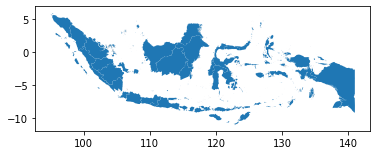

In [2]:
map_df.plot()

<AxesSubplot:>

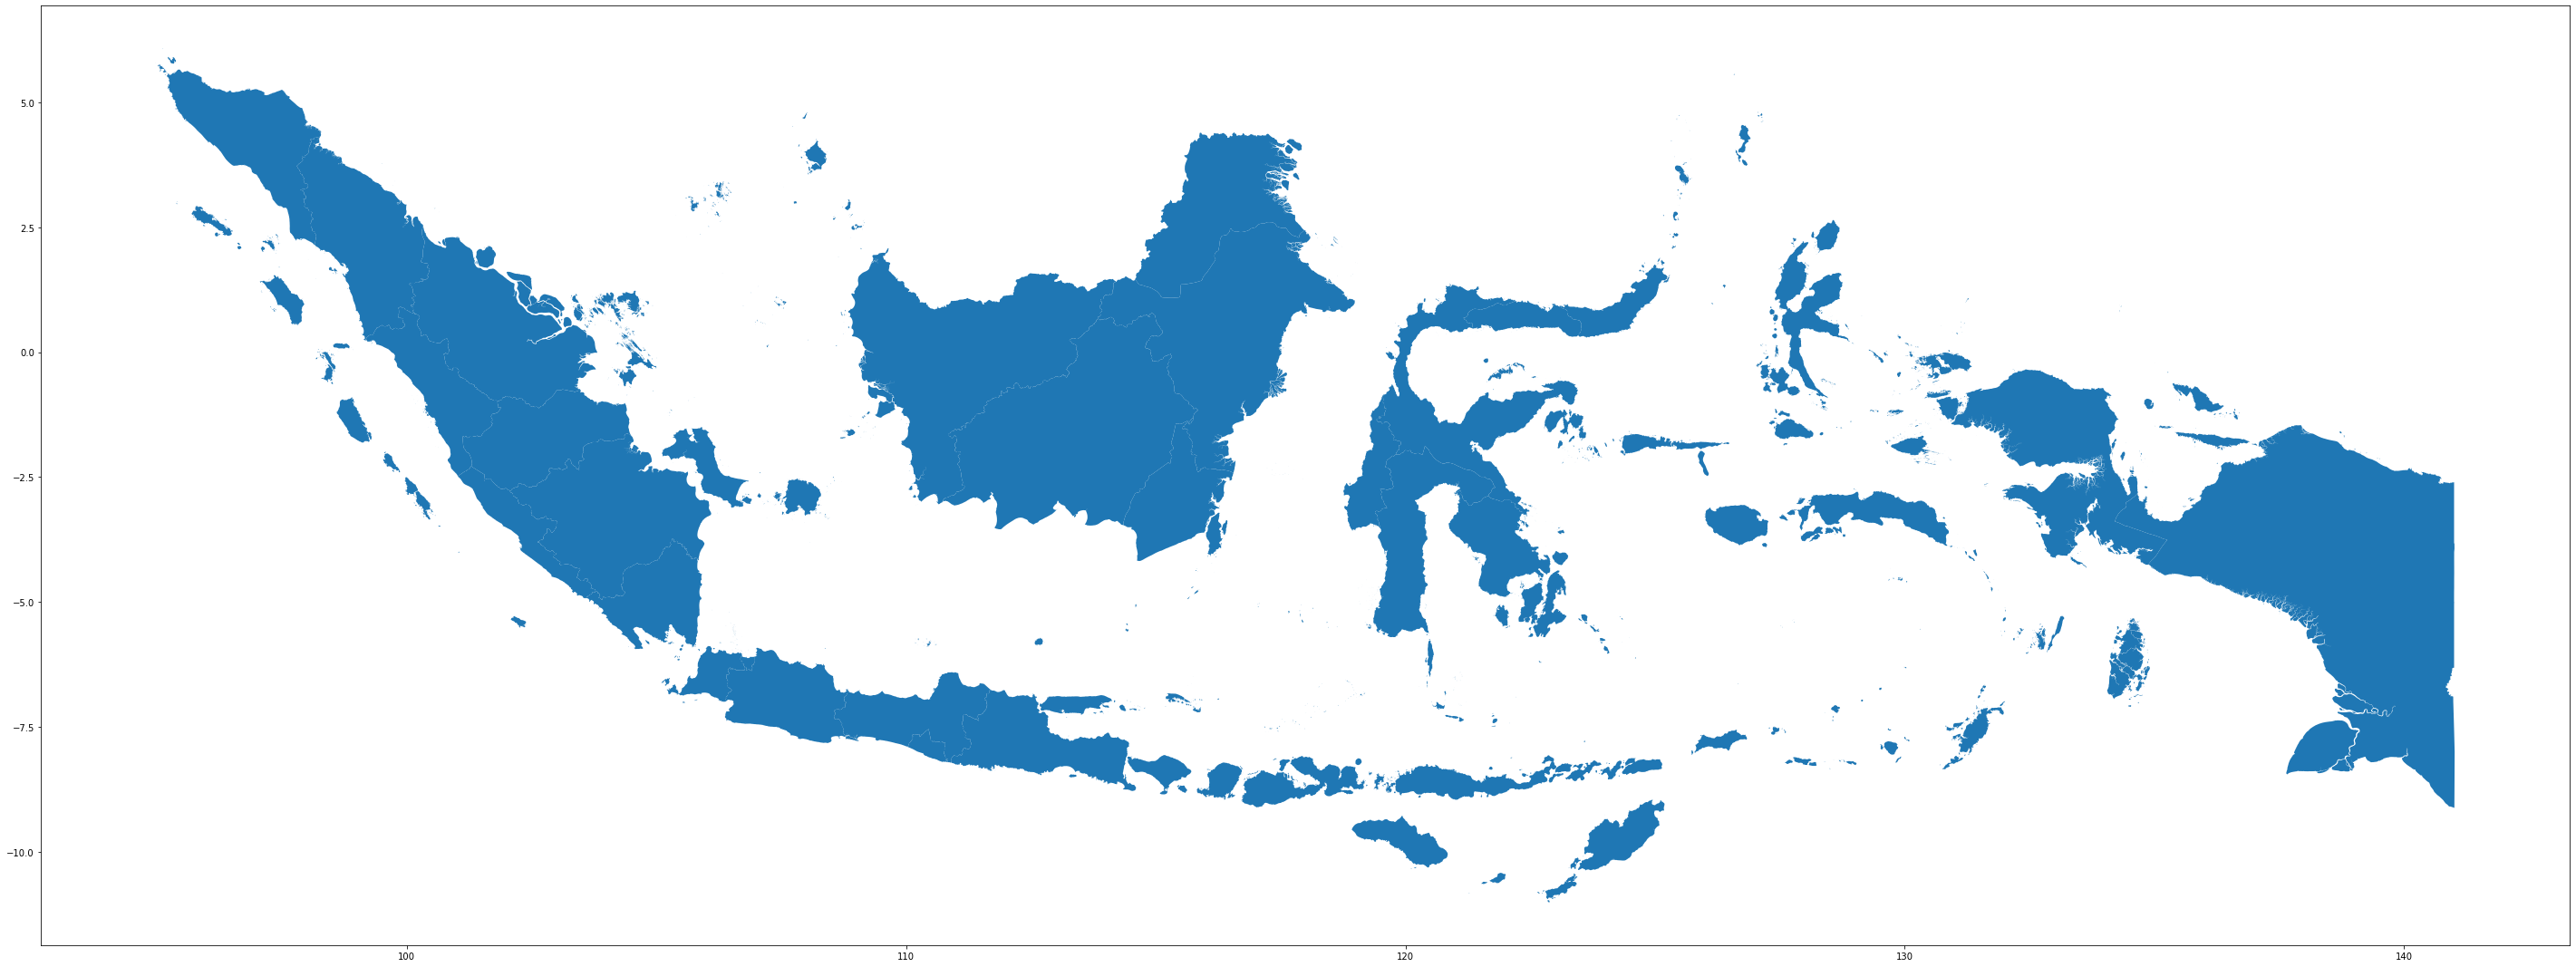

In [3]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()

In [4]:
# Load province data
province = pd.read_csv(dataurl,sep=";")
province.head()

,province,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Jawa Timur,38828061,48,828,38,9,29
1,Jawa Tengah,33753023,41,894,35,6,29
2,Sumatera Utara,13923262,73,188,33,8,25
3,Papua,3143088,319,8,29,1,28
4,Jawa Barat,46668214,35,1,27,9,18


## Merge and Show the Map

In [5]:
# Join shapefile with CSV
merged = map_df.merge(province, how = 'left', left_on="NAME_1", right_on="province")
merged = merged[['province', 'geometry', 'population_2015', 'area_km2', 'population_density_per_km2',
                'cities_regencies', 'cities', 'regencies']]

merged.head()

,province,geometry,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Aceh,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9...",4993385.0,58.0,77.0,23.0,5,18.0
1,Bali,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ...",4148588.0,6.0,621.0,9.0,1,8.0
2,Bangka-Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ...",1370331.0,16.0,64.0,7.0,1,6.0
3,Banten,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ...",11934373.0,10.0,909.0,8.0,4,4.0
4,Bengkulu,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ...",1872136.0,20.0,84.0,10.0,1,9.0


### Plot

<AxesSubplot:title={'center':'# of Cities per Region'}>

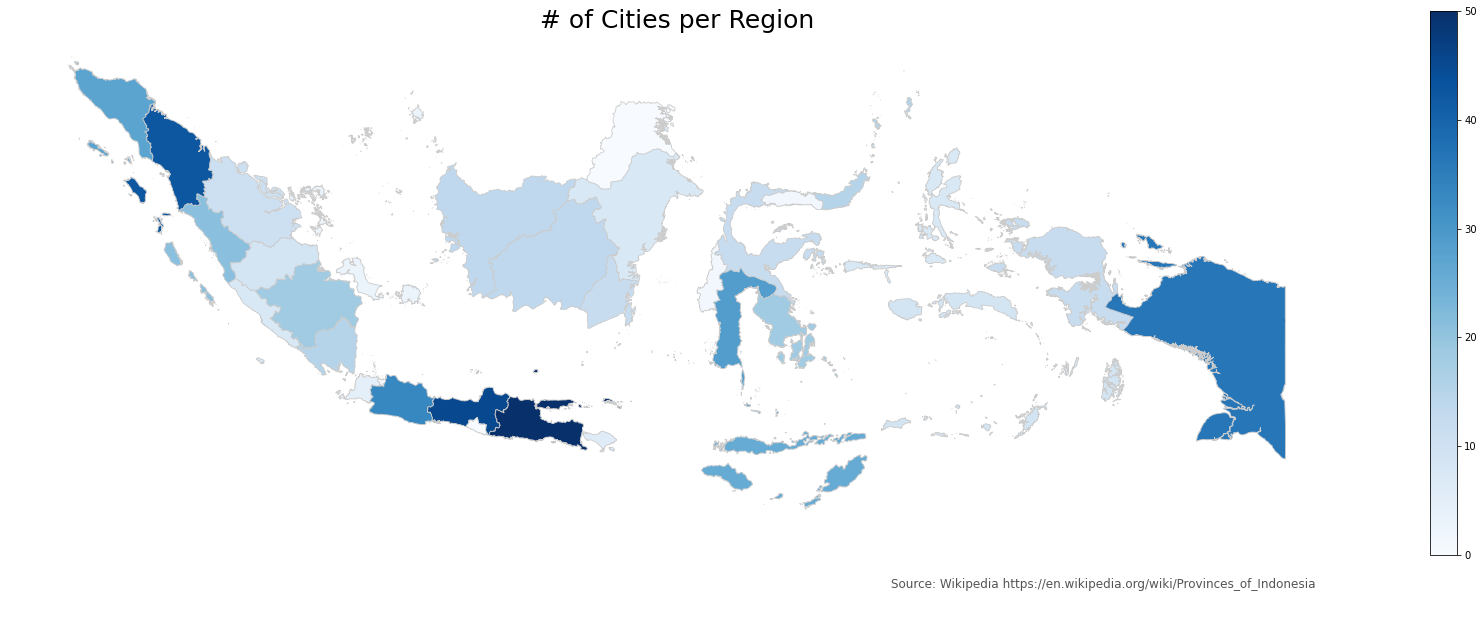

In [10]:
# Value column to visualize
variable = 'cities_regencies'

# Range of cloropleth values
vmin, vmax = 0, 50

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(30, 10))

# Remove axes
ax.axis('off')

# Add titles and annotations
ax.set_title('# of Cities per Region', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('Source: Wikipedia https://en.wikipedia.org/wiki/Provinces_of_Indonesia',
            xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Colorbar and legend
sm = plt.cm.ScalarMappable(cmap = 'Blues',
                        norm = plt.Normalize(vmin=vmin, vmax=vmax))

# Empty array for the data range
sm.set_array([])

# Add the colorbar
fig.colorbar(sm)

# Actual map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
